<a href="https://colab.research.google.com/github/eshal26/Leukemia-classification/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip Original.zip

Archive:  Original.zip
   creating: Original/Benign/
  inflating: Original/Benign/WBC-Benign-001.jpg  
  inflating: Original/Benign/WBC-Benign-002.jpg  
  inflating: Original/Benign/WBC-Benign-003.jpg  
  inflating: Original/Benign/WBC-Benign-004.jpg  
  inflating: Original/Benign/WBC-Benign-005.jpg  
  inflating: Original/Benign/WBC-Benign-006.jpg  
  inflating: Original/Benign/WBC-Benign-007.jpg  
  inflating: Original/Benign/WBC-Benign-008.jpg  
  inflating: Original/Benign/WBC-Benign-009.jpg  
  inflating: Original/Benign/WBC-Benign-010.jpg  
  inflating: Original/Benign/WBC-Benign-011.jpg  
  inflating: Original/Benign/WBC-Benign-012.jpg  
  inflating: Original/Benign/WBC-Benign-013.jpg  
  inflating: Original/Benign/WBC-Benign-014.jpg  
  inflating: Original/Benign/WBC-Benign-015.jpg  
  inflating: Original/Benign/WBC-Benign-016.jpg  
  inflating: Original/Benign/WBC-Benign-017.jpg  
  inflating: Original/Benign/WBC-Benign-018.jpg  
  inflating: Original/Benign/WBC-Benign-019.jpg

In [2]:
import os
import shutil

# Define paths to your dataset directories
dataset_dir = 'Original'
benign_dir = os.path.join(dataset_dir, 'Benign')
malignant_dir = os.path.join(dataset_dir, 'Malignant')  # Create this directory if it doesn't exist

# Create the malignant directory if it doesn't exist
if not os.path.exists(malignant_dir):
    os.makedirs(malignant_dir)

# Move images from early, pre, and pro directories to malignant directory
for stage in ['Early', 'Pre', 'Pro']:
    stage_dir = os.path.join(dataset_dir, stage)
    for img_file in os.listdir(stage_dir):
        img_path = os.path.join(stage_dir, img_file)
        shutil.move(img_path, malignant_dir)

# Update dataset directory structure and labels
os.rmdir(os.path.join(dataset_dir, 'Early'))
os.rmdir(os.path.join(dataset_dir, 'Pre'))
os.rmdir(os.path.join(dataset_dir, 'Pro'))


In [3]:

from sklearn.model_selection import train_test_split

# Define paths to your original dataset directory
original_data_dir = 'Original'
benign_dir = os.path.join(original_data_dir, 'Benign')
malignant_dir = os.path.join(original_data_dir, 'Malignant')

# Define paths to create directories for the new dataset splits
train_dir = 'train_dataset'
val_dir = 'validation_dataset'
test_dir = 'test_dataset'

# Create directories for the new dataset splits if they don't exist
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)
    for category in ['Benign', 'Malignant']:
        os.makedirs(os.path.join(directory, category), exist_ok=True)

# Split dataset and copy images to appropriate directories
for category_dir, category in [(benign_dir, 'Benign'), (malignant_dir, 'Malignant')]:
    image_files = [os.path.join(category_dir, img) for img in os.listdir(category_dir)]
    train_files, test_val_files = train_test_split(image_files, test_size=0.2, random_state=42)
    val_files, test_files = train_test_split(test_val_files, test_size=0.5, random_state=42)

    for file in train_files:
        shutil.copy(file, os.path.join(train_dir, category))
    for file in val_files:
        shutil.copy(file, os.path.join(val_dir, category))
    for file in test_files:
        shutil.copy(file, os.path.join(test_dir, category))


In [4]:

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [5]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Define transformations to apply to each image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to 224x224
    transforms.ToTensor(),           # Convert image to tensor
    transforms.Normalize(mean=[0.6490, 0.7092, 0.8777], std=[0.0151, 0.0215, 0.0138])  # Normalize pixel values
])

# Load the dataset using ImageFolder
train_dataset = ImageFolder('train_dataset', transform=transform)
val_dataset = ImageFolder('validation_dataset', transform=transform)
test_dataset = ImageFolder('test_dataset', transform=transform)

# Create DataLoader objects for batching and shuffling
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import torchvision.models as models

# Load pre-trained AlexNet
alexnet = models.alexnet(pretrained=True)

# Freeze early layers
for param in alexnet.parameters():
    param.requires_grad = False

# Modify classifier for binary classification
num_classes = 2
alexnet.classifier[6] = nn.Linear(4096, num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet = alexnet.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.classifier.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 110MB/s]


In [6]:
# Calculate mean and standard deviation of the dataset
dataset_mean = torch.stack([img.mean(1).mean(1) for img, _ in train_dataset]).mean(0)
dataset_std = torch.stack([img.std(1).std(1) for img, _ in train_dataset]).std(0)

print("Mean:", dataset_mean)
print("Std Deviation:", dataset_std)


Mean: tensor([11.6021,  6.7430,  4.4375])
Std Deviation: tensor([0.5055, 0.5069, 0.4996])


In [9]:

from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


# Training function
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=30):
    train_acc_history = []
    val_acc_history = []
    train_precision_history = []
    val_precision_history = []
    train_recall_history = []
    val_recall_history = []
    train_f1_history = []
    val_f1_history = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        all_labels = []
        all_preds = []

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

        train_accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
        train_precision = precision_score(all_labels, all_preds, average='binary')
        train_recall = recall_score(all_labels, all_preds, average='binary')
        train_f1 = f1_score(all_labels, all_preds, average='binary')

        train_acc_history.append(train_accuracy)
        train_precision_history.append(train_precision)
        train_recall_history.append(train_recall)
        train_f1_history.append(train_f1)

        print(f"Epoch {epoch + 1}, Training Loss: {running_loss / len(train_loader):.4f}")
        print(f"Epoch {epoch + 1}, Training Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-score: {train_f1:.4f}")

        # Validation phase
        model.eval()
        correct = 0
        total = 0
        all_labels = []
        all_preds = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (preds == labels).sum().item()
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(preds.cpu().numpy())

        val_accuracy = correct / total
        val_precision = precision_score(all_labels, all_preds, average='binary')
        val_recall = recall_score(all_labels, all_preds, average='binary')
        val_f1 = f1_score(all_labels, all_preds, average='binary')

        val_acc_history.append(val_accuracy)
        val_precision_history.append(val_precision)
        val_recall_history.append(val_recall)
        val_f1_history.append(val_f1)

        print(f"Epoch {epoch + 1}, Validation Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1-score: {val_f1:.4f}")

    return model, train_acc_history, val_acc_history, train_precision_history, val_precision_history, train_recall_history, val_recall_history, train_f1_history, val_f1_history



# Train the model
model_ft, train_acc_history, val_acc_history, train_precision_history, val_precision_history, train_recall_history, val_recall_history, train_f1_history, val_f1_history = train_model(alexnet, criterion, optimizer, train_loader, val_loader, num_epochs=30)




Epoch 1/30
----------
Epoch 1, Training Loss: 0.2722
Epoch 1, Training Accuracy: 0.9247, Precision: 0.9498, Recall: 0.9618, F1-score: 0.9558
Epoch 1, Validation Accuracy: 0.9569, Precision: 0.9644, Recall: 0.9855, F1-score: 0.9748
Epoch 2/30
----------
Epoch 2, Training Loss: 0.1679
Epoch 2, Training Accuracy: 0.9466, Precision: 0.9653, Recall: 0.9718, F1-score: 0.9685
Epoch 2, Validation Accuracy: 0.9323, Precision: 0.9922, Recall: 0.9273, F1-score: 0.9586
Epoch 3/30
----------
Epoch 3, Training Loss: 0.2241
Epoch 3, Training Accuracy: 0.9432, Precision: 0.9655, Recall: 0.9673, F1-score: 0.9664
Epoch 3, Validation Accuracy: 0.9508, Precision: 0.9481, Recall: 0.9964, F1-score: 0.9716
Epoch 4/30
----------
Epoch 4, Training Loss: 0.2001
Epoch 4, Training Accuracy: 0.9547, Precision: 0.9715, Recall: 0.9750, F1-score: 0.9732
Epoch 4, Validation Accuracy: 0.9692, Precision: 0.9715, Recall: 0.9927, F1-score: 0.9820
Epoch 5/30
----------
Epoch 5, Training Loss: 0.1879
Epoch 5, Training Accur

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

alexnet.eval()
test_correct = 0
test_total = 0
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Calculate test accuracy
test_accuracy = test_correct / test_total
test_precision = precision_score(all_labels, all_preds, average='binary')
test_recall = recall_score(all_labels, all_preds, average='binary')
test_f1 = f1_score(all_labels, all_preds, average='binary')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-score: {test_f1:.4f}")


Test Accuracy: 0.9847
Test Precision: 0.9892
Test Recall: 0.9928
Test F1-score: 0.9910


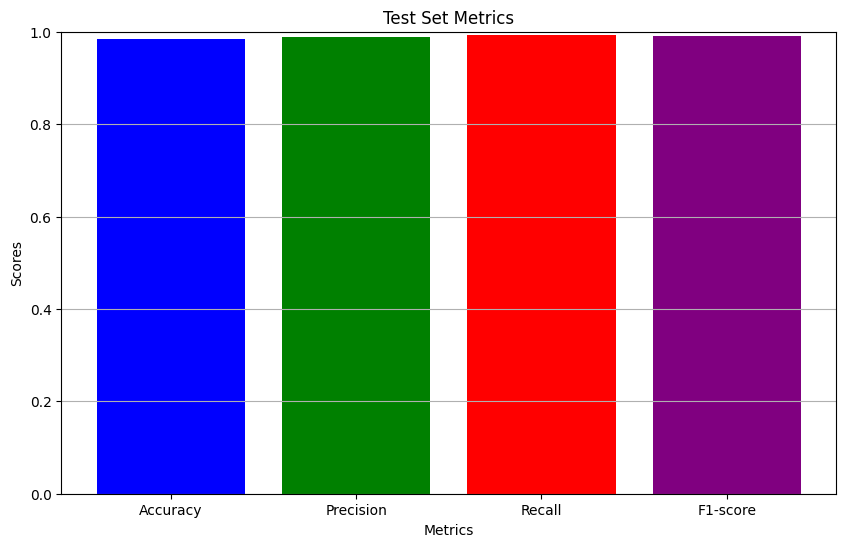

In [12]:
import matplotlib.pyplot as plt

def plot_metrics(test_accuracy, test_precision, test_recall, test_f1):
    metrics = [test_accuracy, test_precision, test_recall, test_f1]
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']

    plt.figure(figsize=(10, 6))
    plt.bar(metric_names, metrics, color=['blue', 'green', 'red', 'purple'])
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.ylim(0, 1)
    plt.title('Test Set Metrics')
    plt.grid(axis='y')
    plt.show()

# Example usage
plot_metrics(test_accuracy, test_precision, test_recall, test_f1)


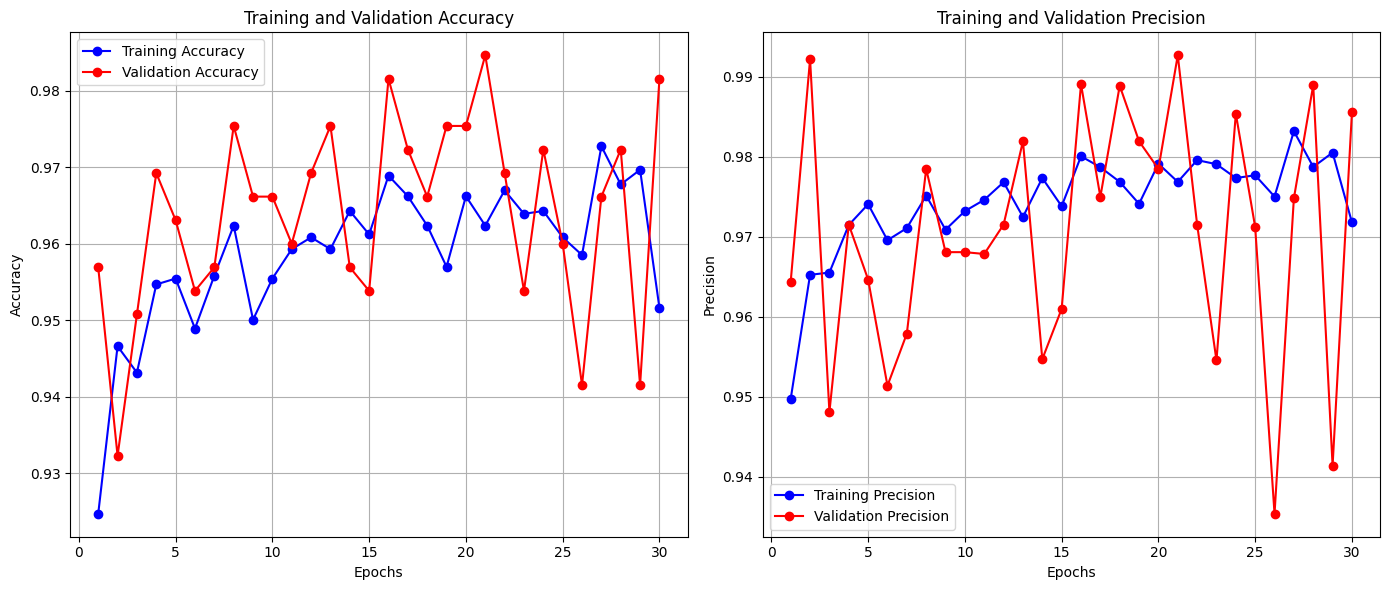

In [13]:
import matplotlib.pyplot as plt

def plot_accuracy_precision(train_acc_history, val_acc_history, train_precision_history, val_precision_history):
    epochs = range(1, len(train_acc_history) + 1)

    plt.figure(figsize=(14, 6))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc_history, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc_history, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot training and validation precision
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_precision_history, 'bo-', label='Training Precision')
    plt.plot(epochs, val_precision_history, 'ro-', label='Validation Precision')
    plt.title('Training and Validation Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


plot_accuracy_precision(train_acc_history, val_acc_history, train_precision_history, val_precision_history)
